<h1 style="font-size:3rem;color:#A3623B;">Lab 1</h1>

<h2> Generation and visualization of data</h2>

<h3> 1.1. Synthetic data</h3>

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    #n_samples = 10 # generate these many data points per class
    n_samples= 10
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [11, 11], [[2, 1], [1, 2]]
    mu2, sigma2 = [-11,-11], [[10, 11], [11, 13]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y

In [3]:
X_syn, y_syn = generate_synthetic_data() 

In [4]:
print(X_syn)
print(y_syn)

[[-11.09994557  -9.74922666]
 [-11.59831958 -13.47417243]
 [ -2.49829479  -2.03392693]
 [ 10.05459582   9.75474629]
 [ 11.55300358  12.43444043]
 [ 10.64452011  10.78373616]
 [ 12.56720633  12.63768735]
 [ -9.68902698  -8.1835282 ]
 [ 11.85950468  10.1192844 ]
 [  7.77939214   9.74988366]
 [ 10.68680022   8.56825435]
 [ 11.93833455  12.57873146]
 [ -7.77765781  -7.59023709]
 [-14.13685361 -14.55808663]
 [-11.65410206 -12.41189552]
 [ 12.06899639  12.65030863]
 [-13.05003524 -12.51743976]
 [ 10.3702538   10.7519639 ]
 [ -9.94763068  -9.43857366]
 [ -9.98837886 -11.40933995]]
[0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0]


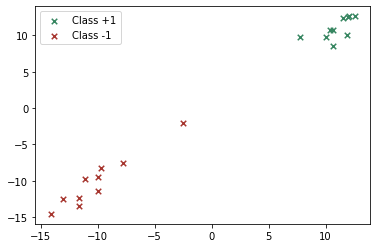

In [5]:
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

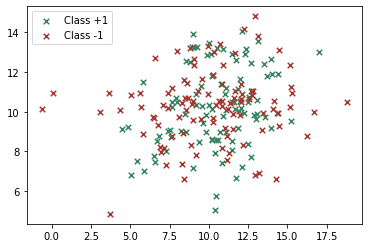

In [6]:
def generate_synthetic_data():
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
    """
## Change the n samples here
    n_samples = 100 # generate these many data points per class
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
# Apply changes to the variance and the mean to make linearaly separated
    mu1, sigma1 = [10, 10], [[5, 1], [1, 5]]
    mu2, sigma2 = [10,10], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    return X,y
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.legend(loc=2, fontsize=10)
plt.show()

### Question:
1-Is the data linearly separable?

2-Play with parameters and plot the following cases:
    
    a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.
    b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.
    c)n=100, 40% of objects in Class -1, 60% in Class +1, linearly separable.
    d)n=100, 40% of objects in Class -1, 60% in Class +1, non-linearly separable.
    
    

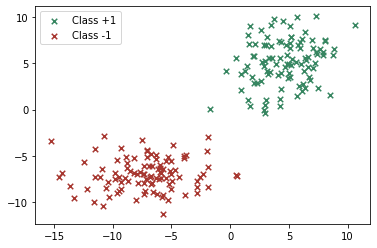

In [7]:
# a) generate by percentage 50% linearly separable
def generate_synthetic_data(): 
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
    """
## Change the n samples here
    n_samples = 100 # generate these many data points per class
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
# Apply changes to the variance and the mean to make linearaly separated
    mu1, sigma1 = [5, 5], [[5, 1], [1, 5]]
    mu2, sigma2 = [-7,-7], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    return X,y
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.legend(loc=2, fontsize=10)
plt.show()

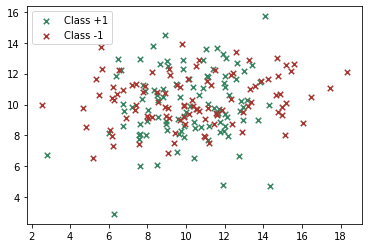

In [8]:
# b) generate by percentage 50% no_linearly separable
def generate_synthetic_data(): 
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
    """
## Change the n samples here
    n_samples = 100 # generate these many data points per class
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
# Apply changes to the variance and the mean to make linearaly separated
    mu1, sigma1 = [10, 10], [[5, 1], [1, 5]]
    mu2, sigma2 = [10,10], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    return X,y
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.legend(loc=2, fontsize=10)
plt.show()

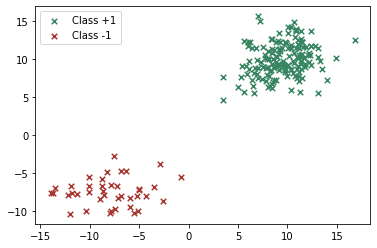

In [9]:
# c) generate by percentage 40% 60% linearly sperable
def generate_synthetic_data():
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
    """
## Change the n samples here
    n_samples = 100 # generate these many data points per class
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
# Apply changes to the variance and the mean to make linearaly separated
    mu1, sigma1 = [10, 10], [[5, 1], [1, 5]]
    mu2, sigma2 = [-7,-7], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples+60), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples+40),mu2, sigma2, 0) # negative class
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    return X,y
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.legend(loc=2, fontsize=10)
plt.show()

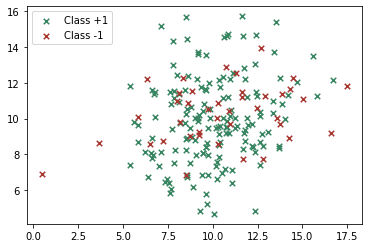

In [10]:
# d) generate by percentage 40% 60% non_linearly sperable
def generate_synthetic_data():
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
    """
## Change the n samples here
    n_samples = 100 # generate these many data points per class
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
# Apply changes to the variance and the mean to make linearaly separated
    mu1, sigma1 = [10, 10], [[5, 1], [1, 5]]
    mu2, sigma2 = [10,10], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples+60), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples+40),mu2, sigma2, 0) # negative class
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    return X,y
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.legend(loc=2, fontsize=10)
plt.show()

### Your answer:

1-The data is not linearly separable because some classes +1 are inside the class -1

<h3> 1.2. Real data: Iris dataset</h3>

In [11]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The iris dataset has $n=150$ objects in dimension $d=4$ with 3 classes. We will create a dataset in $d=2$ with only 2 classes.

In [12]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
#print(X)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)


100


Now let's visualize the data:

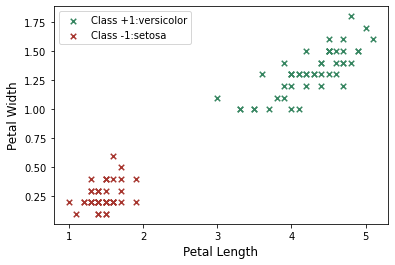

In [13]:
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Petal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

In [14]:
#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

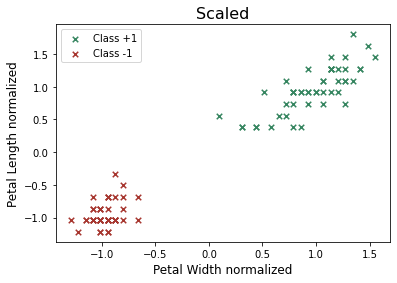

In [15]:
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

### Question:

Plot different examples by changing:

    a) The selected features.
    b) The selected classes.
    c) The selected features and classes.
    d) All the above normalized.

Pay attention to legend and axis labels, so that they reflect your choices. Include a brief explanation.

### Your answer:

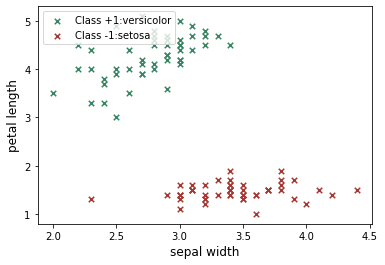

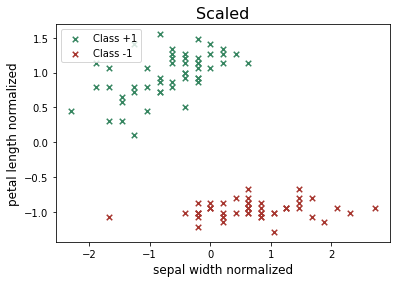

In [16]:
#a/ plot of 2 different features sepal width (cm) petal length normalized

X = iris["data"][:, (1, 2)]  # sepal width (cm) petal length (cm)
#print(X)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
#print(y.size)

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("sepal width", fontsize=12)
plt.ylabel("petal length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("sepal width normalized", fontsize=12)
plt.ylabel("petal length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

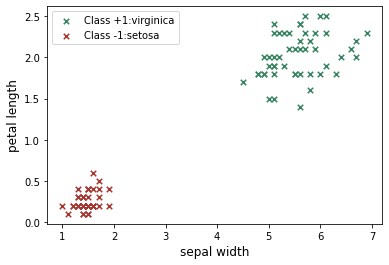

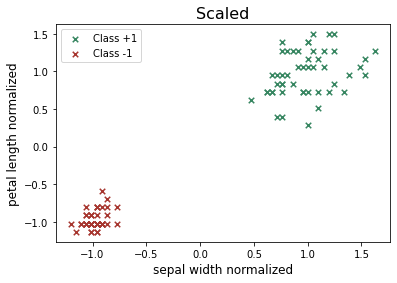

In [17]:
#b/ changing only the classes (1,2)
X = iris["data"][:, (2, 3)]  # sepal width (cm) petal length (cm)
#print(X)

y = iris["target"]


setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
#print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("sepal width", fontsize=12)
plt.ylabel("petal length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==2][:, 0], X_scaled[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("sepal width normalized", fontsize=12)
plt.ylabel("petal length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

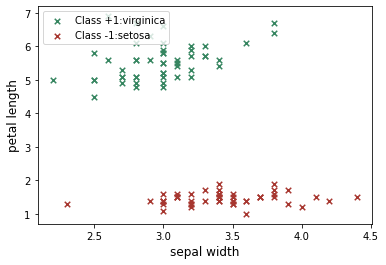

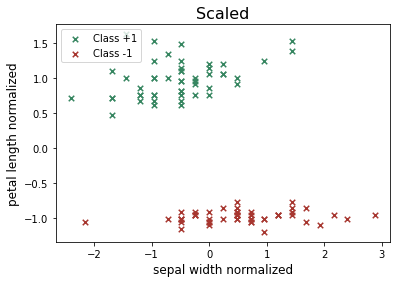

In [18]:
#c/ changing the classes and features
X = iris["data"][:, (1, 2)]  # sepal width (cm) petal length (cm)
#print(X)

y = iris["target"]


setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
#print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("sepal width", fontsize=12)
plt.ylabel("petal length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==2][:, 0], X_scaled[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("sepal width normalized", fontsize=12)
plt.ylabel("petal length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()